Please consult the end of chapter 9.4 of _Pattern Recognition and Machine Learning_.

# Motivation for Online Mixture of Gaussians

Online algorithms consider a single data point at a time rather than an entire batch. Online could also be called "incremental." 

When applying Expectation Maximization to a gaussian mixture given large amounts of data, the batch method's calculation time depends on the number of data points. In the online formulation, the Expectation and Maximization steps both take fixed time since they operate on only a single data point. This can provide a significant performance boost when you don't need to consider the entire batch of data every iteration.

In the online formulation of Mixture of Gaussians, the parameters are updated incrementally. That means the algorithm can converge more quickly than a batch approach.

# Derivation of Online Gaussian Mixture

We derive 9.78 & 9.79 in the text. The purpose is to define an incremental update step to the mean of a gaussian. We start from 9.18, the definition of the mean.

\begin{align}
    \mathbf{\mu}_k &= \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) \mathbf{x}_n \\
    N_k &= \sum_{n=1}^{N} \gamma(z_{nk})
\end{align}

### Updating N
We will consider an update technique where we recompute the responsibilities for a single data point, $\mathbf{x}_m$. We initialize by using our definition from above.

\begin{align}
    N_{k}^{old} &= \sum_{n} \gamma^{old}(z_{nk}) \\
    N_{k}^{new} &= \sum_{n \neq m} \gamma^{old}(z_{nk}) + \gamma^{new}(z_{mk})
\end{align}

We can use these results, subtitute $N_{k}^{old}$ into the ladder equation to retrieve 9.79. (Subtract out when $m = n$ to convert $N_{k}^{old}$ to the sum in the ladder equation.)

\begin{equation}
    N_{k}^{new} = N_{k}^{old} + \gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})
\end{equation}

### Updating the mean
Now, let us derive the mean update. We use a similar update technique.

\begin{align}
    \mathbf{\mu}_k^{old} &= \frac{1}{N_k^{old}} \sum_{n=1}^{N} \gamma^{old} (z_{nk}) \mathbf{x}_n
\end{align}

Now we recompute the responsibilities, $\gamma(z_{mk})$, from a single point.

\begin{align}
    \mathbf{\mu}_k^{new} &= \frac{1}{N_k^{new}} \Big(
                            \sum_{n \neq m} \gamma^{old}(z_{nk}) \mathbf{x}_n + \gamma^{new}(z_{mk}) \mathbf{x}_m \Big) \\
    &= \frac{1}{N_k^{new}}
        \Big( N_k^{old} \mathbf{\mu}_k^{old} - \gamma^{old}(z_{mk}) \mathbf{x}_m + \gamma^{new}(z_{mk}) \mathbf{x}_m \Big) \\
    &= \frac{1}{N_k^{new}}
        \Big( \big( N_{k}^{new} - \gamma^{new}(z_{mk}) + \gamma^{old}(z_{mk}) \big) \mathbf{\mu}_k^{old} - \gamma^{old}(z_{mk}) \mathbf{x}_m + \gamma^{new}(z_{mk}) \mathbf{x}_m \Big) \\
    &= \mathbf{\mu}_k^{old} + 
        \Big( \frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}} \Big)
        (\mathbf{x}_m - \mathbf{\mu}_k^{old})
\end{align}

### Updating the covariances

Similar update but for covariances

\begin{align}
    \mathbf{\Sigma}_k^{old} &= \frac{1}{N_k^{old}} \sum_{n} \gamma^{old} (z_{nk}) (\mathbf{x}_n - \mathbf{\mu}_k^{old})
        (\mathbf{x}_n - \mathbf{\mu}_k^{old})^{T}
\end{align}

Now we recompute the responsibilities, $\gamma(z_{mk})$, from a single point.

\begin{align}
    \mathbf{\Sigma}_k^{new} ={}& \frac{1}{N_k^{new}} \sum_{n} \Big(
        \gamma^{new} (z_{nk}) (\mathbf{x}_n - \mathbf{\mu}_k^{new}) (\mathbf{x}_n - \mathbf{\mu}_k^{new})^{T} \Big) \\
    ={}& \frac{1}{N_k^{new}} \sum_{n \neq m} \Big(
        \gamma^{old} (z_{nk}) (\mathbf{x}_n - \mathbf{\mu}_k^{new}) (\mathbf{x}_n - \mathbf{\mu}_k^{new})^{T} +
        \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \Big) \\
    ={}& \frac{1}{N_k^{new}} 
        \Big[ 
        \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &- \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &+ \sum_{n} \gamma^{old} (z_{nk}) (\mathbf{x}_n - \mathbf{\mu}_k^{new}) (\mathbf{x}_n - \mathbf{\mu}_k^{new})^{T}
        \Big]
\end{align}

Next we define $A = \frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}$. We will also use in the next section: $(a - b) (a - b)^T = aa^T - ab^T - ba^T + bb^T$.

\begin{align}
    \mathbf{\Sigma}_k^{new} ={}& \frac{1}{N_k^{new}} 
        \Big[ 
        \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &- \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &+ \sum_{n} \gamma^{old} (z_{nk}) 
        \Big(
        \big(\mathbf{x}_n - \mathbf{\mu}_k^{old} - A(\mathbf{x}_m - \mathbf{\mu}_k^{old})\big)
        \big(\mathbf{x}_n - \mathbf{\mu}_k^{old} - A(\mathbf{x}_m - \mathbf{\mu}_k^{old})\big)^{T}
        \Big)
        \Big] \\
    ={}& \frac{1}{N_k^{new}} 
        \Big[ 
        \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &- \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &+ \sum_{n} \gamma^{old} (z_{nk}) 
        \Big\{
        \big(\mathbf{x}_n - \mathbf{\mu}_k^{old}\big) \big(\mathbf{x}_n - \mathbf{\mu}_k^{old}\big)^{T} \\
        &- A \big(\mathbf{x}_n - \mathbf{\mu}_k^{old}\big) \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big)^{T} \\
        &- A \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big) \big(\mathbf{x}_n - \mathbf{\mu}_k^{old}\big)^{T} \\
        &+ A^{2} \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big) \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big)^{T}
        \Big\}
        \Big] \\
    ={}& \frac{1}{N_k^{new}} 
        \Big[ 
        \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &- \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &+ N_k^{old} \mathbf{\Sigma}_k^{old} \\
        &- A \sum_{n} \gamma^{old} (z_{nk})
        \big\{
        (\mathbf{x}_n - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^{T}
        + (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_n - \mathbf{\mu}_k^{old})^{T} 
        \big\} \\
        &+ A^{2} \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big) \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big)^{T}
        \Big]
\end{align}

RIGHT ABOVE HERE. YOU DIDN'T DEAL WITH THE SUM RIGHT

We can distribute gamma and the sum over $n$, then substitute our definition of the mean to remove any dependce on $n$. Similarly to what we did for the new mean, we can substitute our $N_{old}$.

\begin{align}
    \mathbf{\Sigma}_k^{new} ={}& \frac{1}{N_k^{new}} 
        \Big[ 
        \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &- \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &+ N_k^{old} \mathbf{\Sigma}_k^{old} \\
        &- A 
        \Big\{
        (N_k^{old} \mathbf{\mu}_k^{old} - \gamma^{old} (z_{mk}) \mathbf{\mu}_k^{old}) 
        (\mathbf{x}_m - \mathbf{\mu}_k^{old})^{T}
        +
        (\mathbf{x}_m - \mathbf{\mu}_k^{old})
        (N_k^{old} \mathbf{\mu}_k^{old} - \gamma^{old} (z_{mk}) \mathbf{\mu}_k^{old})^{T} 
        \Big\}\\
        &+ A^{2} \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big) \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big)^{T}
        \Big] \\
    ={}& \frac{1}{N_k^{new}} 
        \Big[ 
        \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &- \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &+ \big(N_{k}^{new} - \gamma^{new}(z_{mk}) + \gamma^{old}(z_{mk})\big) \mathbf{\Sigma}_k^{old} \\
        &- A \big(N_{k}^{new} - \gamma^{new}(z_{mk})\big)
        \Big\{ 
        (\mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^{T}
        + (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{\mu}_k^{old})^{T} 
        \Big\}\\
        &+ A^{2} \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big) \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big)^{T}
        \Big] \\
    ={}& \mathbf{\Sigma}_k^{old} + \frac{1}{N_k^{new}} 
        \Big[ 
        \big(\gamma^{new}(z_{mk}) - \gamma^{old} (z_{mk})\big)
        \big(\mathbf{x}_m - \mathbf{\mu}_k^{new}\big) \big(\mathbf{x}_m - \mathbf{\mu}_k^{new}\big)^{T} \\
        &+ \big(\gamma^{old}(z_{mk}) - \gamma^{new}(z_{mk})\big) \mathbf{\Sigma}_k^{old} \\
        &- \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big) \big(N_{k}^{new} - \gamma^{new}(z_{mk})\big)
        \Big\{ 
        (\mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^{T}
        + (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{\mu}_k^{old})^{T} 
        \Big\}\\
        &+ \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)^{2} \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big) \big(\mathbf{x}_m - \mathbf{\mu}_k^{old}\big)^{T}
        \Big]
\end{align}



\begin{align}
    \mathbf{\Sigma}_k^{new} ={}& \frac{1}{N_k^{new}} \sum_{n} \Big(
        \gamma^{new} (z_{nk}) (\mathbf{x}_n - \mathbf{\mu}_k^{new}) (\mathbf{x}_n - \mathbf{\mu}_k^{new})^{T} \Big) \\
    ={}& \frac{1}{N_k^{new}} \sum_{n \neq m} \Big(
        \gamma^{old} (z_{nk}) (\mathbf{x}_n - \mathbf{\mu}_k^{new}) (\mathbf{x}_n - \mathbf{\mu}_k^{new})^{T} +
        \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \Big) \\ 
    ={}& \frac{1}{N_k^{new}} \sum_{n \neq m} \Big(
        \gamma^{old} (z_{nk}) \Big(
        \mathbf{x}_n - \mathbf{\mu}_k^{old} - \Big( \frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}} \Big) (\mathbf{x}_m - \mathbf{\mu}_k^{old})
        \Big) \Big(
        \mathbf{x}_n - \mathbf{\mu}_k^{old} - \Big( \frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}} \Big) (\mathbf{x}_m - \mathbf{\mu}_k^{old})
        \Big)^{T} \\
        &+
        \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \Big) \\
\end{align}

Okay, now that's seperated so we can apply the sigma old.
\begin{align}
    \mathbf{\Sigma}_k^{new} ={}& \frac{1}{N_k^{new}} \sum_{n \neq m} 
        \Big[
        \gamma^{old} (z_{nk}) 
        \Big(
        (\mathbf{x}_n - \mathbf{\mu}_k^{old}) (\mathbf{x}_n - \mathbf{\mu}_k^{old})^T \\
        &- \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big) 
        (\mathbf{x}_n - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T \\
        &- \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big) (\mathbf{x}_m - \mathbf{\mu}_k^{old})
        (\mathbf{x}_n - \mathbf{\mu}_k^{old})^T \\
        &+ \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)^{2}
        (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T
        \Big) \\
        &+\gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} 
        \Big] \\ 
    ={}& \frac{1}{N_k^{new}} 
        \Big\{
        N_k^{old} \mathbf{\Sigma}_k^{old} \\
        &- \gamma^{old}(z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^{T} \\
        &- \sum_{n \neq m} 
        \Big[
        \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big) \gamma^{old} (z_{nk}) 
        \Big( 
        (\mathbf{x}_n - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T 
        + (\mathbf{x}_m - \mathbf{\mu}_k^{old})
        (\mathbf{x}_n - \mathbf{\mu}_k^{old})^T \Big) \Big] \\
        &+ \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)^{2}
        \gamma^{old} (z_{nk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T \\
        &+\gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T}
        \Big\} \\ 
    ={}& \frac{1}{N_k^{new}} 
        \Big\{
        N_k^{old} \mathbf{\Sigma}_k^{old} \\
        &- \gamma^{old}(z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^{T} \\
        &+ \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &- \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big) \sum_{n} 
        \Big[
        \gamma^{old} (z_{nk}) 
        \Big( 
        (\mathbf{x}_n - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T 
        + (\mathbf{x}_m - \mathbf{\mu}_k^{old})
        (\mathbf{x}_n - \mathbf{\mu}_k^{old})^T 
        \Big) 
        \Big] \\
        &+ 2 \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)
        \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T   \\
        &+ \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)^{2}
        \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T
        \Big\} \\ 
\end{align}

Now apply our definition of $N_k^{old}$.

\begin{align}
    ={}& \frac{1}{N_k^{new}} 
        \Big\{
        \big(N_{k}^{new} - \gamma^{new}(z_{mk}) + \gamma^{old}(z_{mk})\big) \mathbf{\Sigma}_k^{old} \\
        &- \gamma^{old}(z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^{T} \\
        &+ \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &- \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big) \sum_{n} 
        \Big[
        \gamma^{old} (z_{nk}) 
        \Big( 
        (\mathbf{x}_n - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T 
        + (\mathbf{x}_m - \mathbf{\mu}_k^{old})
        (\mathbf{x}_n - \mathbf{\mu}_k^{old})^T 
        \Big) 
        \Big] \\
        &+ 2 \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)
        \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T   \\
        &+ \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)^{2}
        \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T
        \Big\} \\
   \mathbf{\Sigma}_k^{new} ={}& \mathbf{\Sigma}_k^{old} + \frac{1}{N_k^{new}} 
        \Big\{
        \gamma^{old}(z_{mk}) \mathbf{\Sigma}_k^{old} \\
        &- \gamma^{new}(z_{mk}) \mathbf{\Sigma}_k^{old} \\
        &- \gamma^{old}(z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^{T} \\
        &+ \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
        &- \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big) \sum_{n} 
        \Big[
        \gamma^{old} (z_{nk}) (\mathbf{x}_n - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T 
        + \gamma^{old} (z_{nk})  (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_n - \mathbf{\mu}_k^{old})^T
        \Big] \\
        &+ 2 \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)
        \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T   \\
        &+ \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)^{2}
        \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T
        \Big\} \\ 
\end{align}

### Updating the mixing coefficients

Update for mixing coefficients. $\pi_{k} = \frac{N_{k}}{N}$.

\begin{equation}
    \pi_{k}^{old} = \frac{N_{k}^{old}}{N}
\end{equation}

Update the mixing coefficients...

\begin{align}
    \pi_{k}^{new} &= \frac{N_{k}^{new}}{N} \\
        &= \frac{1}{N} \sum_{n \neq m} \gamma^{old}(z_{nk}) + \gamma^{new}(z_{mk}) \\
        &= \frac{1}{N} \Big( N_{k}^{old} + \gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk}) \Big)
\end{align}

# Algorithm for Online Gaussian Mixture

1. As usual, initalize the means $\mathbf{\mu}_k$, covariances $\Sigma_k$, and mixing coefifients $\pi_k$, and evaluate the inital value of the log likelihood. In addition, initalize the responsibilities, $\gamma(z_{nk})$ to random numbers between 0 and 1. Use this to compute your initial $N_k$

    \begin{equation}
        N_{k} = \sum_{n=1}^{N} \gamma(z_{nk}).
    \end{equation}
    
2. **E Step** Evaluate the responsibilities using the current parameter values for a single data point

    \begin{equation}
        \gamma(z_{mk}) = \frac{\pi_{k} 
                                \mathcal{N}( \mathbf{x}_m \mid \mathbf{\mu}_k, \mathbf{\Sigma}_k)
                                }{\Sigma_{j=1}^{K} \pi_{j} \mathcal{N}( \mathbf{x}_m \mid \mathbf{\mu}_j, \mathbf{\Sigma}_j)}
    \end{equation}

3. **M Step** Update the parameters using the current responsibilities.

    \begin{align}
        N_{k}^{new} ={}& N_{k}^{old} + \gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk}) \\
        \mathbf{\mu}_k^{new} ={}& \mathbf{\mu}_k^{old} + 
            \Big( \frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}} \Big)
            (\mathbf{x}_m - \mathbf{\mu}_k^{old}) \\
        \mathbf{\Sigma}_k^{new} ={}& \mathbf{\Sigma}_k^{old} + \frac{1}{N_k^{new}} 
            \Big\{
            \gamma^{old}(z_{mk}) \mathbf{\Sigma}_k^{old} \\
            &- \gamma^{new}(z_{mk}) \mathbf{\Sigma}_k^{old} \\
            &- \gamma^{old}(z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^{T} \\
            &+ \gamma^{new} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{new}) (\mathbf{x}_m - \mathbf{\mu}_k^{new})^{T} \\
            &- \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big) \sum_{n} 
            \Big[
            \gamma^{old} (z_{nk}) (\mathbf{x}_n - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T 
            + \gamma^{old} (z_{nk})  (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_n - \mathbf{\mu}_k^{old})^T
            \Big] \\
            &+ 2 \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)
            \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T   \\
            &+ \Big(\frac{\gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk})}{N_{k}^{new}}\Big)^{2}
            \gamma^{old} (z_{mk}) (\mathbf{x}_m - \mathbf{\mu}_k^{old}) (\mathbf{x}_m - \mathbf{\mu}_k^{old})^T
            \Big\} \\ 
        \pi_{k}^{new} ={}& \frac{1}{N} \Big( N_{k}^{old} + \gamma^{new}(z_{mk}) - \gamma^{old}(z_{mk}) \Big)
    \end{align}
    
4. Evaluate the log likelihood

    \begin{equation}
        \ln p(\mathbf{X} \mid \mathbf{\mu}, \mathbf{\Sigma}, \mathbf{\pi}) =
            \sum_{n=1}^{N} \ln 
            \Big\{ \sum_{k=1}^{K} \pi_{k} \mathcal{N}(\mathbf{x}_n \mid \mathbf{\mu}_k, \mathbf{\Sigma}_{k} \Big\}
    \end{equation}
    
    and check for convergence of either the parameters or the log likelihood. If the convergence criterion is not satisfied return to step 2.

# Implementation and Example
Note that the implementation was modified from code written by my classmate, Valentin Wolf.  
https://github.com/volflow/Expectation-Maximization

In [5]:
import numpy as np
from scipy.stats import multivariate_normal

class EM:
    def __init__(self, X, clusters=2, init_cov_size=120, verbose=False):
        self.verbose = verbose
        self.X = X
        self.clusters = clusters
        self.datapoints = self.X.shape[0]
        dims = self.X.shape[1]
        self.it = 0
        self.init_cov_size = init_cov_size

#         # initialize with random points and identitiy matrices
#         self.cluster_centers = np.random.uniform(low=self.X.min(axis=0),
#                                                  high=self.X.max(axis=0),
#                                                  size=(self.clusters,self.X.shape[1]))

        # init means with random points from the data; seems to result in fewer singulartities
        rand = np.random.choice(self.datapoints, self.clusters, replace=False)
        self.cluster_centers = self.X[rand, :]

        self.responsibilities = np.random.rand(self.clusters, X.shape[0])
        if 0:
            # Init responsibilities
            self.cluster_covs = np.stack([np.eye(dims) * self.init_cov_size] * self.clusters, axis=0)
            self.mixing_coeffs = np.full(self.clusters, 1 / self.clusters)
            self.responsibilities = self._first_expectation(self.X)
        elif 1:
            # Init cov
            self.cluster_covs = np.stack([np.eye(dims) * self.init_cov_size] * self.clusters, axis=0)
            self._first_cov(self.X)
            self.mixing_coeffs = np.full(self.clusters, 1 / self.clusters)
        else:
            self.cluster_covs = np.stack([np.eye(dims) * self.init_cov_size] * self.clusters, axis=0)
            self.mixing_coeffs = np.full(self.clusters, 1 / self.clusters)
            
    def fit(self, iterations=10):
        for i in range(iterations):
            online_dp_ind = self.it % self.X.shape[0]
            # Expectation
            new_responsibilities = self._expectation(self.X, online_dp_ind)
            # Maximization
            self._maximization(new_responsibilities, online_dp_ind)
            self.responsibilities = new_responsibilities
            self.it += 1
        return self.cluster_centers, self.cluster_covs

    def _first_expectation(self,X):
        tripel = zip(self.cluster_centers,self.cluster_covs,self.mixing_coeffs)
        responsibilities = np.zeros((self.clusters,X.shape[0]))
        divisor_sum = np.zeros((X.shape[0]))
        
        for i,(mean,cov,mixing_coeff) in enumerate(tripel):
            resp = mixing_coeff * multivariate_normal.pdf(X,mean,cov,allow_singular=True)
            responsibilities[i] = resp
            divisor_sum += resp
        responsibilities /= divisor_sum
        return responsibilities
    
    def _first_cov(self, X):
        X = self.X
               
        for i, (resp, mean) in enumerate(zip(self.responsibilities, self.cluster_centers)):
            Nk = resp.sum()
            unweighted_product = np.einsum('ji,jk->jik', (X-mean), (X-mean))
            cov_sum = (resp[:,np.newaxis,np.newaxis]*unweighted_product).sum(axis=0)
            new_cov = 1/Nk * cov_sum
            
            self.cluster_covs[i] = new_cov
    
    def _expectation(self, X, online_dp_ind):
        tripel = zip(self.cluster_centers, self.cluster_covs, self.mixing_coeffs)
        responsibilities = self.responsibilities.copy()
        divisor_sum = 0

        for i, (mean, cov, mixing_coeff) in enumerate(tripel):
            resp = mixing_coeff * multivariate_normal.pdf(X[online_dp_ind, :], mean, cov, allow_singular=True)
            responsibilities[i, online_dp_ind] = resp
            divisor_sum += resp
        responsibilities[:, online_dp_ind] /= divisor_sum
        return responsibilities

    def _maximization(self, new_responsibilities, online_dp_ind):
        X = self.X
        for i, (new_resp, old_resp) in enumerate(zip(new_responsibilities, self.responsibilities)):            
            Nk_old = old_resp.sum()
            mean_old = self.cluster_centers[i].copy()
            cov_old = self.cluster_covs[i].copy()
            mixcoef_old = self.mixing_coeffs[i].copy()
            gamma_old = old_resp[online_dp_ind]

            point = X[online_dp_ind, i]

            gamma_new = new_resp[online_dp_ind]
            Nk_new = Nk_old + gamma_new - gamma_old
            if Nk_new <= 1:
                # catch near singularities
                print("Singularity detected")

                # choosing new mean uniformly random
                new_mean = np.random.uniform(low=self.X.min(axis=0),
                                             high=self.X.max(axis=0))

                # choosing random points form X as mean
#                 rand = np.random.choice(self.datapoints, self.clusters, replace=False)
#                 mean_new = X[rand, :]
                cov_new = np.eye(self.X.shape[1]) * self.init_cov_size
            else:
                coef = (gamma_new - gamma_old)/Nk_new
                mean_new = mean_old + (coef * (point - mean_old))
                
                cov_new = cov_old
                cov_new += (Nk_new ** (-1)) * (
                    (gamma_new - gamma_old) * np.outer((point - mean_new), (point - mean_new).T) +
                    (gamma_old - gamma_new) * cov_old -
                    coef * (Nk_new - gamma_new) * np.outer(mean_old, (point - mean_old).T) -
                    coef * (Nk_new - gamma_new) * np.outer((point - mean_old), mean_old.T) + 
                    (coef ** 2) * np.outer((point - mean_old), (point - mean_old).T)
                )
#                 cov_new = cov_old
#                 cov_new += Nk_new ** (-1) * gamma_old * cov_old
#                 cov_new -= Nk_new ** (-1) * gamma_new * cov_old
#                 cov_new -= Nk_new ** (-1) * gamma_old * np.outer((point - mean_old), (point - mean_old).T)
#                 cov_new += Nk_new ** (-1) * gamma_new * np.outer((point - mean_new), (point - mean_new).T)
#                 summed = np.sum(old_resp[:, np.newaxis] * (X - mean_old))
#                 cov_new -= Nk_new ** (-1) * coef * (
#                     np.outer(summed, (point - mean_new).T) + np.outer((point - mean_new), summed.T)
#                 )
#                 cov_new += 2 * Nk_new ** (-1) * coef * gamma_old * np.outer((point - mean_old), (point - mean_old).T)
#                 cov_new += Nk_new ** (-1) * coef ** 2 * gamma_old * np.outer((point - mean_old), (point - mean_old).T)
            mixcoef_new = Nk_new / self.responsibilities.shape[0]

            if self.verbose:
                print('Mean difference: {}'.format(mean_new - mean_old))
            self.cluster_centers[i] = mean_new
            self.cluster_covs[i] = cov_new
            self.mixing_coeffs[i] = mixcoef_new

    def predict(self, X):
        resp = self._expectation(X)
        cluster_prediction = resp.argmax(axis=0)
        prediction = np.copy(X)
        for i, mean in enumerate(self.cluster_centers):
            prediction[cluster_prediction == i] = mean
        return prediction

In [2]:
from numpy import pi, sin, cos
import matplotlib.pyplot as plt
%matplotlib inline

def oval(cov, num_points=100,radius=1):
    arcs = np.linspace(0, 2 * pi, num_points)
    x = radius * sin(arcs)
    y = radius * cos(arcs)
    
    xy = np.array(list(zip(x, y)))
    x, y = zip(*xy.dot(cov))
    return x,y

def make_plot(a):
    plt.figure(figsize=(6, 5))
    plt.title("EM iteration {}".format(a.it))

    colors = ['g', 'r', 'c', 'm', 'y', 'b' ]
    
    # selcect elements based on expectation
    x, y = zip(*X)
    try:
        plt.scatter(x, y, edgecolors="black",c=a.responsibilities[0],cmap='RdYlGn')
    except AttributeError:
        plt.scatter(x, y, edgecolors="black",color='y')
    for i in range(a.cluster_centers.shape[0]):
        # plot centers
        plt.scatter(a.cluster_centers[i,0],a.cluster_centers[i,1],s=250,color=colors[i],edgecolors="white")

        # plot ovals that show the shape of the  variances
        x, y = oval(a.cluster_covs[i],radius=2)
        x += a.cluster_centers[i,0]
        y += a.cluster_centers[i,1]
        plt.plot(x, y,linewidth=5,color=colors[i])

# Example with 2D dataset

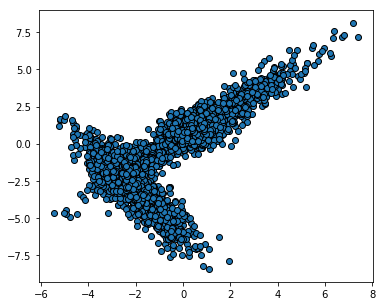

In [3]:
import pandas as pd

# import dataset
X = pd.read_csv("data/2d-em.csv", header=None).as_matrix()
# plot dataset
x, y = zip(*X)
plt.figure(figsize=(6, 5))
plt.scatter(x, y, edgecolors="black")

ValueError: the input matrix must be positive semidefinite

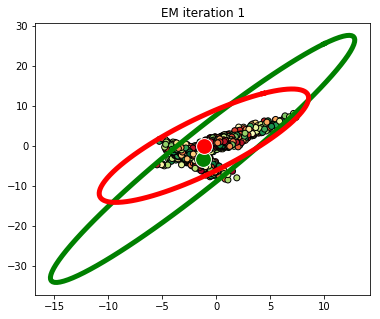

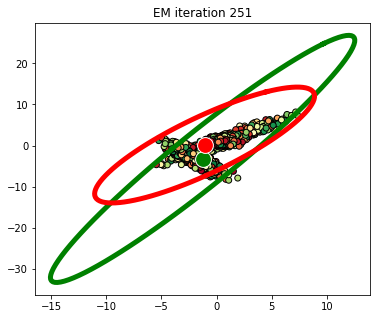

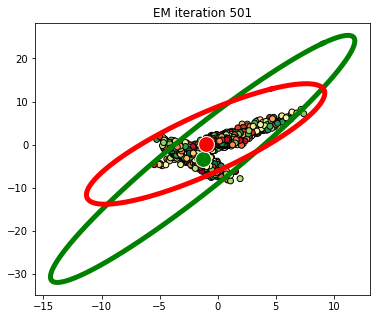

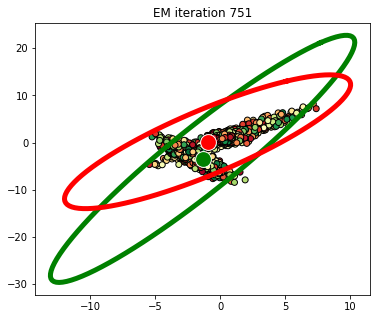

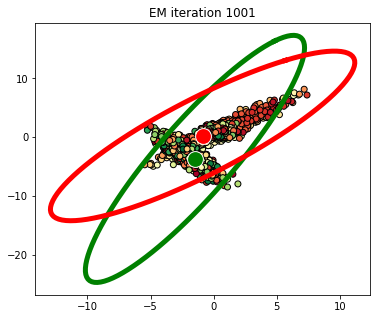

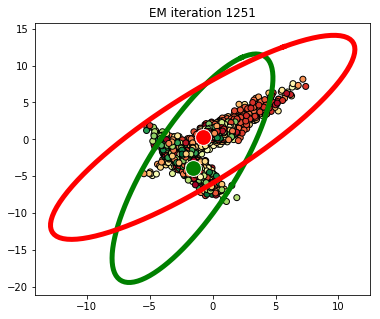

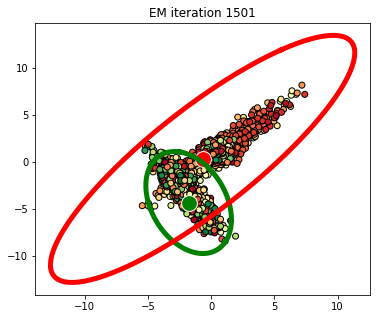

In [7]:
a = EM(X,2,init_cov_size=2, verbose=False)
ite = [1]
if 1:
    ite.extend([250] * (4 * 3 * 5))
else:
    ite.extend([3000] * 5)

for i in ite: 
    mm = a.fit(i)
    make_plot(a)

In [ ]:
a.mixing_coeffs.shape